<a href="https://colab.research.google.com/github/ShanShajahan/Diabetes-Prediction/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
productdb22 = pd.read_csv('drive/MyDrive/productdb22.csv')
print(productdb22.columns)

Index(['event_type', 'category_id', 'category_code', 'brand', 'qty', 'price',
       'level'],
      dtype='object')


# New Section

In [ ]:
productdb22.head()


,event_type,category_id,category_code,brand,qty,price,level
0,1,2.050000e+18,502,102,0,67.85,1
1,1,2.050000e+18,502,104,0,149.01,1
2,1,2.050000e+18,502,103,0,116.35,1
3,1,2.050000e+18,502,104,0,118.87,1
4,1,2.050000e+18,504,106,0,33.44,1


In [ ]:
print(productdb22.groupby('level').size())


level
1     5
2     7
3    27
4    28
5    34
6    33
7    20
8    21
dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='level', ylabel='count'>

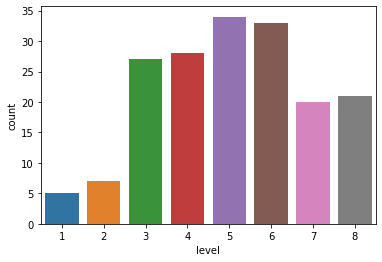

In [ ]:
import seaborn as sns
sns.countplot(productdb22['level'],label="count")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(productdb22.loc[:, productdb22.columns != 'level'], productdb22['level'], stratify=productdb22['level'], random_state=66)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn.fit(X_train, y_train)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         7
           5       0.20      1.00      0.34         9
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         5

    accuracy                           0.20        44
   macro avg       0.03      0.12      0.04        44
weighted avg       0.04      0.20      0.07        44

[[0 0 0 0 1 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 7 0 0 0]
 [0 0 0 0 7 0 0 0]
 [0 0 0 0 9 0 0 0]
 [0 0 0 0 8 0 0 0]
 [0 0 0 0 5 0 0 0]
 [0 0 0 0 5 0 0 0]]
Accuracy of K-NN classifier on test set: 0.77


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(random_state=0)

In [ ]:
tree.fit(X_train, y_train)
pred1 = tree.predict(X_test)
print(classification_report(y_test, pred1))
print(confusion_matrix(y_test, pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         2
           3       1.00      0.86      0.92         7
           4       1.00      0.86      0.92         7
           5       0.89      0.89      0.89         9
           6       0.80      1.00      0.89         8
           7       0.75      0.60      0.67         5
           8       1.00      0.80      0.89         5

    accuracy                           0.86        44
   macro avg       0.87      0.88      0.86        44
weighted avg       0.89      0.86      0.87        44

[[1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 1 6 0 0 0 0 0]
 [0 0 0 6 1 0 0 0]
 [0 1 0 0 8 0 0 0]
 [0 0 0 0 0 8 0 0]
 [0 0 0 0 0 2 3 0]
 [0 0 0 0 0 0 1 4]]


In [ ]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 0.977


In [ ]:
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on test set: 0.864


In [ ]:
import matplotlib.pyplot as plt

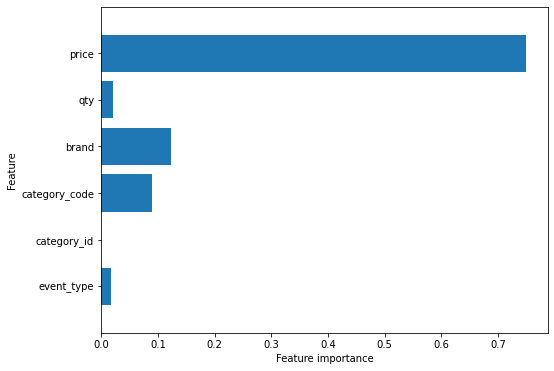

In [ ]:
purchasefeatures=[x for i,x in enumerate(productdb22.columns) if i!=6]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 6
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), purchasefeatures)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
pred2 = rf.predict(X_test)
print(classification_report(y_test, pred2))
print(confusion_matrix(y_test, pred2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.40      1.00      0.57         2
           3       1.00      0.86      0.92         7
           4       1.00      0.86      0.92         7
           5       0.89      0.89      0.89         9
           6       0.80      1.00      0.89         8
           7       0.75      0.60      0.67         5
           8       1.00      0.80      0.89         5

    accuracy                           0.84        44
   macro avg       0.73      0.75      0.72        44
weighted avg       0.86      0.84      0.84        44

[[0 1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 1 6 0 0 0 0 0]
 [0 0 0 6 1 0 0 0]
 [0 1 0 0 8 0 0 0]
 [0 0 0 0 0 8 0 0]
 [0 0 0 0 0 2 3 0]
 [0 0 0 0 0 0 1 4]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))

Accuracy on training set: 0.977


In [ ]:
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on test set: 0.841


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
pred3 = gb.predict(X_test)
print(classification_report(y_test, pred3))
print(confusion_matrix(y_test, pred3))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.33      0.50      0.40         2
           3       1.00      0.71      0.83         7
           4       0.88      1.00      0.93         7
           5       0.89      0.89      0.89         9
           6       0.89      1.00      0.94         8
           7       0.75      0.60      0.67         5
           8       0.80      0.80      0.80         5

    accuracy                           0.82        44
   macro avg       0.69      0.69      0.68        44
weighted avg       0.83      0.82      0.82        44

[[0 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 0]
 [0 2 5 0 0 0 0 0]
 [0 0 0 7 0 0 0 0]
 [1 0 0 0 8 0 0 0]
 [0 0 0 0 0 8 0 0]
 [0 0 0 0 0 1 3 1]
 [0 0 0 0 0 0 1 4]]


In [ ]:
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))

Accuracy on training set: 0.977


In [ ]:
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on test set: 0.818


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))

Accuracy on training set: 0.19


In [ ]:
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on test set: 0.18


In [ ]:
from sklearn.neural_network import MLPClassifier



In [ ]:
mlp = MLPClassifier(random_state=42)

In [ ]:
mlp.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [ ]:
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))

Accuracy on training set: 0.15


In [ ]:
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on test set: 0.16


In [ ]:
from sklearn.naive_bayes import BernoulliNB
mn = BernoulliNB()
mn.fit(X_train, y_train)

BernoulliNB()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = mn.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred) )

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         7
           5       0.20      1.00      0.34         9
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         5

    accuracy                           0.20        44
   macro avg       0.03      0.12      0.04        44
weighted avg       0.04      0.20      0.07        44

[[0 0 0 0 1 0 0 0]
 [0 0 0 0 2 0 0 0]
 [0 0 0 0 7 0 0 0]
 [0 0 0 0 7 0 0 0]
 [0 0 0 0 9 0 0 0]
 [0 0 0 0 8 0 0 0]
 [0 0 0 0 5 0 0 0]
 [0 0 0 0 5 0 0 0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB
mn = GaussianNB()
mn.fit(X_train, y_train)
pred = mn.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         2
           3       0.75      0.86      0.80         7
           4       1.00      0.71      0.83         7
           5       1.00      0.56      0.71         9
           6       0.42      1.00      0.59         8
           7       0.00      0.00      0.00         5
           8       1.00      0.40      0.57         5

    accuracy                           0.64        44
   macro avg       0.58      0.57      0.52        44
weighted avg       0.70      0.64      0.61        44

[[0 1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 1 6 0 0 0 0 0]
 [0 0 1 5 0 1 0 0]
 [0 0 1 0 5 3 0 0]
 [0 0 0 0 0 8 0 0]
 [0 0 0 0 0 5 0 0]
 [0 0 0 0 0 2 1 2]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
